<a href="https://colab.research.google.com/github/solcanalla/fiumark/blob/main/decisiontree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo: Decision Tree #



##Inicialización##

In [32]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier


In [33]:
!git clone https://github.com/solcanalla/fiumark.git
%cd fiumark
!git pull origin main
import preprocessing as pp

Cloning into 'fiumark'...
remote: Enumerating objects: 153, done.
remote: Counting objects: 100% (153/153), done.
remote: Compressing objects: 100% (133/133), done.
remote: Total 153 (delta 82), reused 46 (delta 19), pack-reused 0
Receiving objects: 100% (153/153), 337.38 KiB | 6.49 MiB/s, done.
Resolving deltas: 100% (82/82), done.
/content/fiumark/fiumark/fiumark/fiumark
From https://github.com/solcanalla/fiumark
 * branch            main       -> FETCH_HEAD
Already up to date.


In [34]:
from sklearn.metrics import roc_curve, auc

def plot_roc(_fpr, _tpr, x):

    roc_auc = auc(_fpr, _tpr)

    plt.figure(figsize=(15, 10))
    plt.plot(
        _fpr, _tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})'
    )
    plt.scatter(_fpr, x)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

##Pre procesamiento##

In [35]:
pd.options.display.max_columns = None
df = pp.get_dataset()
df = pp.common_preprocessing(df)
X_train, X_test, y_train, y_test = pp.get_train_test_data(df)

##Entrenamiento##

In [36]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': np.arange(1, 20),
    'min_samples_leaf': np.arange(1, 10),
    'min_samples_split': np.arange(1,10),
    'criterion': ["gini", "entropy"],
    'splitter': ["best","random"]
}

clf = DecisionTreeClassifier(random_state=42)

gscv = GridSearchCV(
    clf, params, scoring='roc_auc', n_jobs=-1, cv=5, return_train_score=True
).fit(X_train, y_train)

In [37]:
print(f"Best score: {gscv.best_score_}")
print(f"Best params {gscv.best_params_}")

Best score: 0.8494798528588652
Best params {'criterion': 'gini', 'max_depth': 16, 'min_samples_leaf': 7, 'min_samples_split': 2, 'splitter': 'random'}


##Evaluación del modelo##

In [38]:
y_pred = gscv.predict(X_test)

###Precisión recall y F1-score##

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85        95
           1       0.80      0.74      0.77        66

    accuracy                           0.82       161
   macro avg       0.82      0.81      0.81       161
weighted avg       0.82      0.82      0.82       161



###Accuracy###

In [40]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8198757763975155

###Auc-Roc###

In [41]:
from sklearn.metrics import roc_auc_score
auc_roc = roc_auc_score(y_test, y_pred)
auc_roc

0.8080542264752792

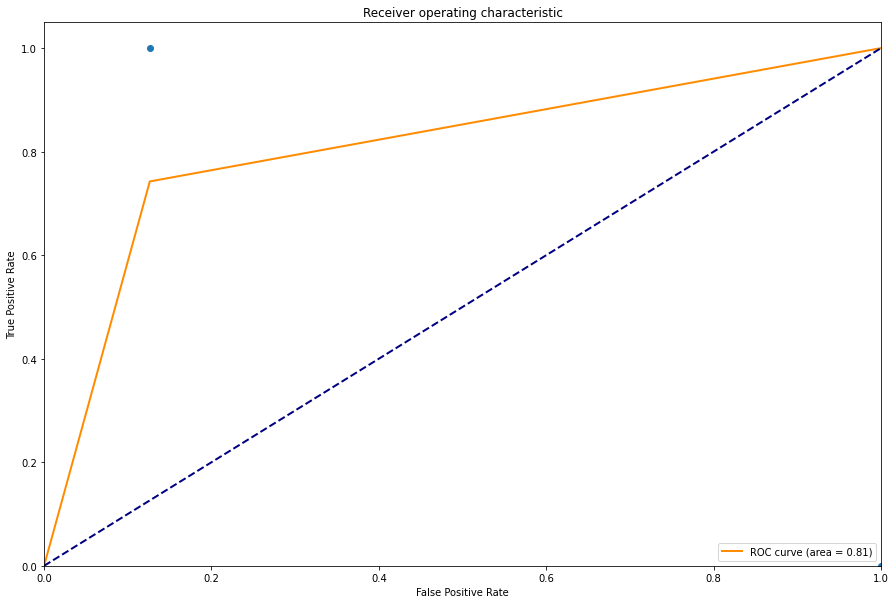

In [42]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plot_roc(fpr, tpr, thresholds)

###Matriz de confusión###

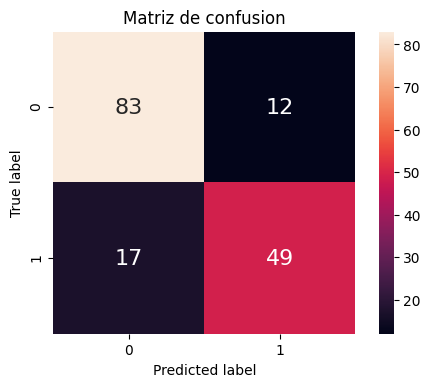

In [43]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred):
    names = sorted(set(y_true))
    cm = confusion_matrix(y_true, y_pred, names)
    df_cm = pd.DataFrame(cm, names, names)

    plt.figure(dpi=100)
    plt.title("Matriz de confusion")
    sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='g', square=True)
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()


plot_confusion_matrix(y_test, y_pred)

##Predicción##

In [44]:
X_holdout = pd.read_csv('https://drive.google.com/uc?export=download&id=1I980-_K9iOucJO26SG5_M8RELOQ5VB6A')
X_holdout = pp.common_preprocessing(X_holdout)
df2 = pd.DataFrame(gscv.predict(X_holdout),columns=['volveria'])
df3 = pd.concat([X_holdout.id_usuario,df2],axis=1)
df3.to_csv('decisiontree.csv')
df3

,id_usuario,volveria
0,650,0
1,234,0
2,31,0
3,552,1
4,411,1
...,...,...
85,354,1
86,82,1
87,172,1
88,8,1
